In [5]:
from nltk import tokenize
from sklearn.metrics import f1_score, precision_score, recall_score
import pandas as pd

In [6]:


path ="/Users/pranoysarath/PycharmProjects/pythonProject1/AI_FInal_project/sequentiality_full_liwc.csv"
df_original = pd.read_csv(path)
df_original = df_original.rename(columns={'Text' : 'story'})
# df_original = df_original.copy()

df_processed = pd.read_csv("/Users/pranoysarath/PycharmProjects/pythonProject1/AI_FInal_project/seq_processed.csv")
df_processed['memType'] = df_original['memType'].to_numpy()
df = df_processed
df = df.loc[df.memType.isin(['imagined', 'recalled'])]

df

,Unnamed: 0,AssignmentId,story,sequentiality,wordcount,Analytic,Clout,Authentic,Tone,wordsPerSentence,...,differentiation,motion,space,time,pastfocus,presentfocus,sentence_length,realis_score,concretenes_score,story_type
0,0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,"Concerts are my most favorite thing, and my bo...",0.073301,203,28.28,37.23,79.50,95.54,13.53,...,2.96,1.97,5.42,5.42,8.87,1.97,1059,0.777778,0.256158,imagined
1,1,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,It seems just like yesterday but today makes f...,0.129259,266,42.15,25.84,92.20,48.91,12.67,...,1.88,1.50,3.38,10.53,10.90,4.14,1330,0.741935,0.213483,imagined
2,2,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,About a month ago I went to burning man. I was...,0.079941,162,28.44,1.45,98.95,68.80,10.80,...,1.85,3.09,5.56,8.02,6.79,4.32,783,0.828571,0.166667,imagined
3,3,36WLNQG780WFTLD990VT6XXEYVQEBZ,"Play stupid games, win stupid prizes road trip...",0.108834,304,54.32,88.20,40.37,16.48,12.16,...,1.64,2.96,7.24,6.58,11.18,0.33,1539,0.653846,0.306931,imagined
4,4,32Z9ZLUT1M6BWPTK368LXKUQWLLOHY,I wanted to write about one of the best days i...,0.079781,332,71.58,63.24,68.55,57.93,18.44,...,1.51,2.11,5.12,8.13,12.65,0.60,1724,0.759259,0.246988,imagined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5530,5530,3SKEMFQBZ4RZDN7C2AMMDQKHCV68K1,My dog was diagnosed with lymphoma a year ago ...,0.078590,293,7.21,5.63,90.22,10.17,11.72,...,3.07,3.41,8.19,5.80,12.63,0.00,1474,0.745098,0.255973,recalled
5531,5531,39PAAFCODNMWRITC4CBO6VRL6O4TV3,"Over my vacation from my job, I went to Casper...",0.169067,290,98.04,58.53,94.42,16.31,19.33,...,1.38,4.48,15.52,3.79,8.28,0.00,1593,0.723404,0.267361,recalled
5532,5532,3FE2ERCCZYU396R8MJGQ6TWGLSMOPR,This event was a birthday party for my nephew....,0.078642,162,21.07,95.53,20.50,99.00,10.13,...,1.23,3.70,4.94,6.79,13.58,2.47,845,0.833333,0.327160,recalled
5533,5533,3J88R45B2HKQ3F50NA3MP6N9XXKPXS,This event occurred about two weeks ago. I was...,0.054479,337,6.55,40.06,8.02,57.34,19.82,...,4.75,2.08,2.97,6.23,13.95,1.19,1773,0.861538,0.228916,recalled


In [34]:
df = pd.read_csv("/Users/pranoysarath/PycharmProjects/pythonProject1/AI_FInal_project/seq_processed_v1.csv")

In [8]:
features = ['c_value', 'WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS', 'BigWords', 'function', 'article', 'number', 'prep', 'conj', 'negate', 'cogproc', 'insight', 'discrep', 'tentat', 'certitude', 'differ', 'motion', 'space', 'time', 'focuspast', 'focuspresent', 'concrete_score', 'realis_score', 'sentence_length' ]

mappings = {
    'c_value' : 'sequentiality',
     'WC': 'wordcount', 'WPS' : 'wordsPerSentence',  'prep' : "preposition", 'conj': "conjunction", 'negate' : "negation", 'cogproc' : "cognitiveProcess", 'discrep' : "discrepancy", 'tentat': "tentative",  'differ' : "differentiation",  'focuspast' : 'pastfocus', 'focuspresent' : 'presentfocus', 'concrete_score' : 'concretenes_score', 'memType' : 'story_type'
}

df = df.rename(columns=mappings)
df.columns


,sequentiality,wordcount,Analytic,Clout,Authentic,Tone,wordsPerSentence,BigWords,function,article,...,tentative,certitude,differentiation,motion,space,time,pastfocus,presentfocus,sentence_length,realis_score
2629,0.006880,0.006467,0.010386,0.017641,0.007373,0.021059,0.007784,0.015525,0.013171,0.019867,...,0.009918,0.000000,0.009589,0.011777,0.012189,0.011413,0.022493,0.002962,0.006640,0.016035
1235,0.012294,0.011038,0.005477,0.003684,0.016464,0.010293,0.008301,0.010747,0.014481,0.011641,...,0.017455,0.017935,0.016802,0.018342,0.017838,0.006674,0.018915,0.000000,0.010607,0.013883
2181,0.020929,0.009190,0.005142,0.010011,0.010118,0.020287,0.010364,0.005960,0.015219,0.012981,...,0.027968,0.000000,0.011244,0.016519,0.028934,0.008020,0.004813,0.014614,0.008586,0.008017
230,0.020262,0.007780,0.003927,0.023123,0.008377,0.010716,0.009363,0.007631,0.014194,0.008264,...,0.000000,0.016983,0.007977,0.016310,0.016461,0.014219,0.017081,0.017300,0.007821,0.015708
4829,0.006723,0.012351,0.021875,0.000620,0.016573,0.001977,0.014857,0.014783,0.013709,0.020056,...,0.023406,0.005299,0.006661,0.016414,0.019134,0.011944,0.012294,0.004661,0.012543,0.013373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3828,0.004854,0.023583,0.008224,0.000330,0.016458,0.017028,0.023641,0.013160,0.013778,0.010887,...,0.010910,0.011141,0.017481,0.009692,0.011278,0.012115,0.011539,0.006517,0.023320,0.012068
1319,0.025995,0.009433,0.001273,0.011533,0.010726,0.013330,0.011346,0.006289,0.013601,0.011679,...,0.006810,0.007065,0.017481,0.010735,0.010428,0.009764,0.010056,0.028517,0.009105,0.009735
4081,0.006076,0.008072,0.012244,0.010011,0.013983,0.000683,0.008565,0.013009,0.011726,0.015905,...,0.011967,0.008152,0.012771,0.006253,0.013424,0.013707,0.017237,0.011888,0.008425,0.016580
70,0.017399,0.009531,0.008346,0.000550,0.013562,0.005912,0.009056,0.016285,0.013573,0.014434,...,0.040465,0.013858,0.012983,0.007973,0.005163,0.015470,0.011942,0.012086,0.010399,0.014801


In [26]:
final_columns = ['AssignmentId', 'story', 'sequentiality',
        'wordcount', 'Analytic', 'Clout', 'Authentic', 'Tone',
       'wordsPerSentence', 'BigWords', 'function', 'article', 'number',
       'preposition', 'conjunction', 'negation', 'cognitiveProcess', 'insight',
       'discrepancy', 'tentative', 'certitude', 'differentiation', 'motion',
       'space', 'time', 'pastfocus', 'presentfocus', 'sentence_length',
        'realis_score', 'concretenes_score', 'story_type']

df_final = df[final_columns]
df_final.to_csv("/Users/pranoysarath/PycharmProjects/pythonProject1/AI_FInal_project/seq_final.csv")

I was focusing on trying to pass my technician test at work. I was hired in November and you had six months to complete the course so my deadline was less than a month away. Your boss or someone else is supposed to help you but I was on my own. There was no study book or no specific time set aside for me. Anyways, I had to do this course in work flow and a lot of was very technical. I was getting frustrated. I was one course away from finishing the first section of 2 and i could not pass the quiz for the life of me. You get three attempts before the boss has to ask for the course to be reset. I had to use that twice. With 10 days to go and my boss going on vacation I had to ask to come in on a Saturday to do the course. First thing was that daunting course. I passed it right away with a little bit of my bosses help. It ended up taking me all of that Saturday when i was expecting about an hour or so. It was now off to the final. I passed it first try and got that monkey off my back. I c

In [31]:
df = pd.read_csv("/Users/pranoysarath/PycharmProjects/pythonProject1/AI_FInal_project/seq_final.csv")
df

In [27]:
import spacy

# Load the spaCy English language model
nlp = spacy.load("en_core_web_sm")

def get_mood_proportion(sentence):
    # Process the sentence with spaCy
    doc = nlp(sentence)

    # Counters for realis and irrealis verbs
    realis_count = 0
    irrealis_count = 0

    # Loop through tokens in the sentence
    for token in doc:
        # Check if the token is a verb
        if token.pos_ == "VERB":
            # Check for past or present tense verbs
            if token.tag_ in ["VBD", "VBG", "VBN", "VBP", "VBZ"]:
                realis_count += 1
            else:
                irrealis_count += 1

    # Calculate the proportion of realis verbs
    total_verbs = realis_count + irrealis_count
    proportion_realis = realis_count / float(total_verbs) if total_verbs > 0 else 0

    return proportion_realis

In [32]:
!python -m spacy download en_core_web_sm

In [173]:
from transformers import BertTokenizer, BertModel
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import torch
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
def get_bert_embedding(text):

    # Tokenize input text
    tokens = tokenizer.encode(text, add_special_tokens=True, max_length=512, truncation=True)


    # Convert tokens to PyTorch tensor
    tokens_tensor = torch.tensor([tokens])

    # Forward pass, get hidden states
    with torch.no_grad():
        outputs = model(tokens_tensor)

    # Extract the hidden states (output embeddings) from the last layer
    last_hidden_states = outputs.last_hidden_state

    # For a single sentence input, take the embeddings for [CLS] token
    cls_embedding = last_hidden_states[:, 0, :]

    return cls_embedding.numpy()


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [29]:
!python -m spacy download en_core_web_md

/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score 0.995483288166215
Test score 0.6495031616982837
weighted_f1_score recalled 0.6496319341400678


In [17]:
import spacy
import pandas as pd

# Load the pre-trained spaCy model
nlp = spacy.load("en_core_web_md")

# Load the Concreteness Ratings dataset
concreteness_df = pd.read_excel("/Users/pranoysarath/PycharmProjects/pythonProject1/AI_FInal_project/Concreteness_ratings_Brysbaert_et_al_BRM.xlsx")

def get_concreteness(word):
    # Check if the word is in the Concreteness Ratings dataset
    if word in concreteness_df['Word'].values:
        # Get the concreteness rating for the word
        concreteness = concreteness_df.loc[concreteness_df['Word'] == word, 'Conc.M'].values[0]
        return concreteness
    else:
        return None

def calculate_concrete_proportion(text):
    # Process the text with spaCy
    doc = nlp(text)

    # Counters for concrete and abstract words
    concrete_count = 0
    total_words = 0

    # Iterate through tokens in the document
    for token in doc:
        # Consider only alphabetic tokens (ignore punctuation, numbers, etc.)
        if token.is_alpha:
            total_words += 1
            concreteness_score = get_concreteness(token.text.lower())

            # You can adjust the threshold based on your specific requirements
            # Here, I consider words with a concreteness score greater than 3 as concrete
            if concreteness_score is not None and concreteness_score > 3:
                concrete_count += 1

    # Calculate the proportion of concrete words
    concrete_proportion = concrete_count / total_words if total_words > 0 else 0
    return concrete_proportion

# Example usage
sample_text = "The cat sat on the mat and looked out of the window."
proportion = calculate_concrete_proportion(sample_text)

print(f"The proportion of concrete lexicon in the text is: {proportion}")


The proportion of concrete lexicon in the text is: 0.4166666666666667


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Train score 1.0
Test score 0.6621499548328816
f1 score weighted 0.6537037037037037
f1 score recalled 0.6701940035273368
f1 score Imagined 0.6537037037037037


Text(0.5, 1.0, 'Feature Importance (Derived Top 26 features)')

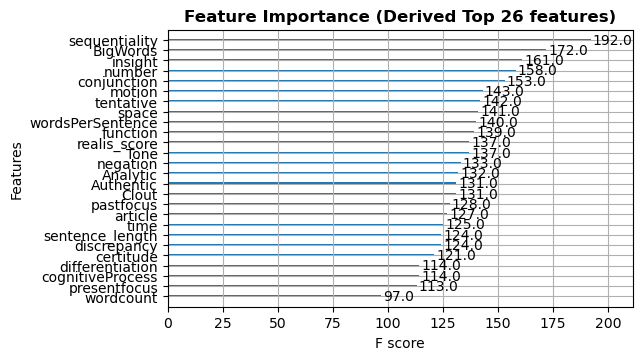

In [35]:
from nltk.sentiment import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
def sentiment(sentence):
    return sid.polarity_scores(sentence)


In [36]:
def get_length(sentence):
    return len(sentence)

def get_count(sentence):
    return len(tokenize.word_tokenize(sentence))

def get_realis(sentence):
    return get_mood_proportion(sentence)
def get_bert(sentence):
    return get_bert_embedding(sentence)
def get_concrete(row):
    if int(row.name) % 100 == 0:
        print(f"concrete row count {row.name}")
    return calculate_concrete_proportion(row['story'])


df['sentence_length'] = df.apply(lambda row: get_length(row['story']), axis = 1)
df['word_count'] = df.apply(lambda row: get_count(row['story']), axis = 1)
df['realis_score'] = df.apply(lambda row: get_realis(row['story']), axis = 1)
df['concrete_score'] = df.apply(lambda row: get_concrete(row), axis = 1)

The best score is 0.6613
The best score standard deviation is 0.0072
Train score 0.9546882009869897
Test score 0.649090909090909


In [10]:
df['text'] = df.apply(lambda row: get_bert(row['story']), axis = 1)

/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score 0.7529358626919602
Test score 0.6540198735320687
f1 score recalled 0.651501364877161
f1 score Imagined 0.6565022421524663


In [256]:
def get_sentiment(row):
    if int(row.name) % 100 == 0:
        print(f"sentiment row count {row.name}")
    return sentiment(row['story'])['neu']

In [37]:
df['sentiment'] = df.apply(lambda row: get_sentiment(row), axis = 1)

 Nearest Neighbors Train score 0.7809394760614273
Nearest Neighbors Test score 0.5763324299909666
 Linear SVM Train score 0.5033875338753387
Linear SVM Test score 0.4968383017163505
 RBF SVM Train score 0.6224028906955736
RBF SVM Test score 0.6214995483288166
 Gaussian Process Train score 0.6915085817524842
Gaussian Process Test score 0.6684733514001807
 Decision Tree Train score 0.6675700090334237
Decision Tree Test score 0.5998193315266486
 Random Forest Train score 0.676829268292683
Random Forest Test score 0.6323396567299007
 Neural Net Train score 0.5033875338753387
Neural Net Test score 0.4968383017163505
 AdaBoost Train score 0.6908310749774165
AdaBoost Test score 0.6693766937669376
 Naive Bayes Train score 0.6339205058717254
Naive Bayes Test score 0.6214995483288166
 QDA Train score 0.6644083107497741
QDA Test score 0.6160794941282746


In [132]:
filtered_df = df.loc[df.memType.isin(['imagined', 'recalled'])]
total_input_columns = ['AssignmentId', 'story', 'c_value', 'WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS', 'BigWords', 'function', 'article', 'number', 'prep', 'conj', 'negate', 'cogproc', 'insight', 'discrep', 'tentat', 'certitude', 'differ', 'motion', 'space', 'time', 'focuspast', 'focuspresent', 'memType','concrete_score', 'word_count', 'realis_score', 'sentence_length']

filtered_columns = ['c_value', 'WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS', 'BigWords', 'function', 'article', 'number', 'prep', 'conj', 'negate', 'cogproc', 'insight', 'discrep', 'tentat', 'certitude', 'differ', 'motion', 'space', 'time', 'focuspast', 'focuspresent', 'memType','concrete_score', 'word_count', 'realis_score', 'sentence_length']
filtered_df  = filtered_df[filtered_columns]
filtered_df

,AssignmentId,story,c_value,WC,Analytic,Clout,Authentic,Tone,WPS,BigWords,...,motion,space,time,focuspast,focuspresent,memType,concrete_score,word_count,realis_score,sentence_length
0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,"Concerts are my most favorite thing, and my bo...",0.073301,203,28.28,37.23,79.50,95.54,13.53,18.23,...,1.97,5.42,5.42,8.87,1.97,imagined,0.256158,233,0.777778,1059
1,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,It seems just like yesterday but today makes f...,0.129259,266,42.15,25.84,92.20,48.91,12.67,10.90,...,1.50,3.38,10.53,10.90,4.14,imagined,0.213483,288,0.741935,1330
2,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,About a month ago I went to burning man. I was...,0.079941,162,28.44,1.45,98.95,68.80,10.80,8.64,...,3.09,5.56,8.02,6.79,4.32,imagined,0.166667,181,0.828571,783
3,36WLNQG780WFTLD990VT6XXEYVQEBZ,"Play stupid games, win stupid prizes road trip...",0.108834,304,54.32,88.20,40.37,16.48,12.16,11.84,...,2.96,7.24,6.58,11.18,0.33,imagined,0.306931,339,0.653846,1539
4,32Z9ZLUT1M6BWPTK368LXKUQWLLOHY,I wanted to write about one of the best days i...,0.079781,332,71.58,63.24,68.55,57.93,18.44,14.16,...,2.11,5.12,8.13,12.65,0.60,imagined,0.246988,361,0.759259,1724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5530,3SKEMFQBZ4RZDN7C2AMMDQKHCV68K1,My dog was diagnosed with lymphoma a year ago ...,0.078590,293,7.21,5.63,90.22,10.17,11.72,14.33,...,3.41,8.19,5.80,12.63,0.00,recalled,0.255973,335,0.745098,1474
5531,39PAAFCODNMWRITC4CBO6VRL6O4TV3,"Over my vacation from my job, I went to Casper...",0.169067,290,98.04,58.53,94.42,16.31,19.33,18.97,...,4.48,15.52,3.79,8.28,0.00,recalled,0.267361,314,0.723404,1593
5532,3FE2ERCCZYU396R8MJGQ6TWGLSMOPR,This event was a birthday party for my nephew....,0.078642,162,21.07,95.53,20.50,99.00,10.13,13.58,...,3.70,4.94,6.79,13.58,2.47,recalled,0.327160,183,0.833333,845
5533,3J88R45B2HKQ3F50NA3MP6N9XXKPXS,This event occurred about two weeks ago. I was...,0.054479,337,6.55,40.06,8.02,57.34,19.82,12.76,...,2.08,2.97,6.23,13.95,1.19,recalled,0.228916,380,0.861538,1773


In [166]:

# X = filtered_df[['c_value', 'WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS', 'BigWords', 'function', 'article', 'number', 'prep', 'conj', 'negate', 'cogproc', 'insight', 'discrep', 'tentat', 'certitude', 'differ', 'motion', 'space', 'time', 'focuspast', 'focuspresent', 'concrete_score', 'realis_score', 'sentence_length']]
X = filtered_df[['c_value']]
y = filtered_df[['memType']]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [167]:
print(len(filtered_df))
X_train.describe()

5535


,c_value
count,4428.000000
mean,0.102188
std,0.086731
min,-0.480659
25%,0.052878
50%,0.080117
75%,0.124296
max,1.347233


In [7]:
columns = ['AssignmentId', 'story', 'sequentiality',
        'wordcount', 'Analytic', 'Clout', 'Authentic', 'Tone',
       'wordsPerSentence', 'BigWords', 'function', 'article', 'number',
       'preposition', 'conjunction', 'negation', 'cognitiveProcess', 'insight',
       'discrepancy', 'tentative', 'certitude', 'differentiation', 'motion',
       'space', 'time', 'pastfocus', 'presentfocus', 'sentence_length',
        'realis_score', 'concretenes_score', 'story_type']

X_columns = ['sequentiality',
 'wordcount',
 'Analytic',
 'Clout',
 'Authentic',
 'Tone',
 'wordsPerSentence',
 'BigWords',
 'function',
 'article',
 'number',
 'conjunction',
 'negation',
 'cognitiveProcess',
 'insight',
 'discrepancy',
 'tentative',
 'certitude',
 'differentiation',
 'motion',
 'space',
 'time',
 'pastfocus',
 'presentfocus',
 'sentence_length',
 'realis_score']

from sklearn import preprocessing
X = df[X_columns]
y = df[['story_type']]

X_scaled = preprocessing.normalize(X, axis=0)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.2, random_state=42)



In [8]:
X_test

,sequentiality,wordcount,Analytic,Clout,Authentic,Tone,wordsPerSentence,BigWords,function,article,...,tentative,certitude,differentiation,motion,space,time,pastfocus,presentfocus,sentence_length,realis_score
2629,0.006880,0.006467,0.010386,0.017641,0.007373,0.021059,0.007784,0.015525,0.013171,0.019867,...,0.009918,0.000000,0.009589,0.011777,0.012189,0.011413,0.022493,0.002962,0.006640,0.016035
1235,0.012294,0.011038,0.005477,0.003684,0.016464,0.010293,0.008301,0.010747,0.014481,0.011641,...,0.017455,0.017935,0.016802,0.018342,0.017838,0.006674,0.018915,0.000000,0.010607,0.013883
2181,0.020929,0.009190,0.005142,0.010011,0.010118,0.020287,0.010364,0.005960,0.015219,0.012981,...,0.027968,0.000000,0.011244,0.016519,0.028934,0.008020,0.004813,0.014614,0.008586,0.008017
230,0.020262,0.007780,0.003927,0.023123,0.008377,0.010716,0.009363,0.007631,0.014194,0.008264,...,0.000000,0.016983,0.007977,0.016310,0.016461,0.014219,0.017081,0.017300,0.007821,0.015708
4829,0.006723,0.012351,0.021875,0.000620,0.016573,0.001977,0.014857,0.014783,0.013709,0.020056,...,0.023406,0.005299,0.006661,0.016414,0.019134,0.011944,0.012294,0.004661,0.012543,0.013373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3828,0.004854,0.023583,0.008224,0.000330,0.016458,0.017028,0.023641,0.013160,0.013778,0.010887,...,0.010910,0.011141,0.017481,0.009692,0.011278,0.012115,0.011539,0.006517,0.023320,0.012068
1319,0.025995,0.009433,0.001273,0.011533,0.010726,0.013330,0.011346,0.006289,0.013601,0.011679,...,0.006810,0.007065,0.017481,0.010735,0.010428,0.009764,0.010056,0.028517,0.009105,0.009735
4081,0.006076,0.008072,0.012244,0.010011,0.013983,0.000683,0.008565,0.013009,0.011726,0.015905,...,0.011967,0.008152,0.012771,0.006253,0.013424,0.013707,0.017237,0.011888,0.008425,0.016580
70,0.017399,0.009531,0.008346,0.000550,0.013562,0.005912,0.009056,0.016285,0.013573,0.014434,...,0.040465,0.013858,0.012983,0.007973,0.005163,0.015470,0.011942,0.012086,0.010399,0.014801


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample documents with multiple sentences
documents,_,_,_ = train_test_split( df[['story']], y, test_size=0.2, random_state=42)
documents = documents['story'].to_list()

# Create the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the documents to obtain TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Get the feature names (words) used as columns in the TF-IDF matrix
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame for better visualization
import pandas as pd
tfidf_df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=feature_names)
print(documents[0])
# print(tfidf_df)

I was focusing on trying to pass my technician test at work. I was hired in November and you had six months to complete the course so my deadline was less than a month away. Your boss or someone else is supposed to help you but I was on my own. There was no study book or no specific time set aside for me. Anyways, I had to do this course in work flow and a lot of was very technical. I was getting frustrated. I was one course away from finishing the first section of 2 and i could not pass the quiz for the life of me. You get three attempts before the boss has to ask for the course to be reset. I had to use that twice. With 10 days to go and my boss going on vacation I had to ask to come in on a Saturday to do the course. First thing was that daunting course. I passed it right away with a little bit of my bosses help. It ended up taking me all of that Saturday when i was expecting about an hour or so. It was now off to the final. I passed it first try and got that monkey off my back. I c

In [57]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Sample documents with multiple sentences
documents,_,_,_ = train_test_split( df[['story']], y, test_size=0.2, random_state=42)
documents = documents['story'].to_list()



# Train the Word2Vec model
# Tokenize the documents and create TaggedDocument objects
tokenized_docs = [doc.split() for doc in documents]
tagged_data = [TaggedDocument(words=doc, tags=[str(i)]) for i, doc in enumerate(tokenized_docs)]
doc2vec_model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=20)
doc2vec_model.build_vocab(tagged_data)
doc2vec_model.train(tagged_data, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

# doc2vec_model.dv
# model.save("word2vec_model.model")


In [55]:
def get_vectorized_dataframe(tfidf_vectorizer, documents):
    tfidf_matrix_inference = tfidf_vectorizer.transform(documents)
    feature_names_inference = tfidf_vectorizer.get_feature_names_out()
    return pd.DataFrame(data=tfidf_matrix_inference.toarray(), columns=feature_names_inference)

def get_doc2vec(model, documents):
    tokenized_new_docs = [doc.split() for doc in documents]
    tagged_new_data = [TaggedDocument(words=doc, tags=[str(i)]) for i, doc in enumerate(tokenized_new_docs)]
    new_doc_vectors = [model.infer_vector(doc.words) for doc in tagged_new_data]

# Create a DataFrame
    new_doc_vector_df = pd.DataFrame(new_doc_vectors, index=range(len(documents)))


    return new_doc_vector_df


In [4]:
columns = ['AssignmentId', 'story', 'sequentiality',
        'wordcount', 'Analytic', 'Clout', 'Authentic', 'Tone',
       'wordsPerSentence', 'BigWords', 'function', 'article', 'number',
       'preposition', 'conjunction', 'negation', 'cognitiveProcess', 'insight',
       'discrepancy', 'tentative', 'certitude', 'differentiation', 'motion',
       'space', 'time', 'pastfocus', 'presentfocus', 'sentence_length',
        'realis_score', 'concretenes_score', 'story_type']

X_columns = ['sequentiality',
 'wordcount',
 'Analytic',
 'Clout',
 'Authentic',
 'Tone',
 'wordsPerSentence',
 'BigWords',
 'function',
 'article',
 'number',
 'conjunction',
 'negation',
 'cognitiveProcess',
 'insight',
 'discrepancy',
 'tentative',
 'certitude',
 'differentiation',
 'motion',
 'space',
 'time',
 'pastfocus',
 'presentfocus',
 'sentence_length',
 'realis_score']

from sklearn import preprocessing
X = df[X_columns]
y = df[['story_type']]

# X_tf_idf = get_vectorized_dataframe(tfidf_vectorizer, df['story'].to_list())
X_dco2vec = get_doc2vec(doc2vec_model, df['story'].to_list())
X = pd.concat([X, X_dco2vec], axis=1)
X.columns = X.columns.astype(str)
X_scaled = preprocessing.normalize(X, axis=0)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.2, random_state=42)



NameError: name 'df' is not defined

In [64]:
X_train

,sequentiality,wordcount,Analytic,Clout,Authentic,Tone,wordsPerSentence,BigWords,function,article,...,90,91,92,93,94,95,96,97,98,99
4981,0.005053,0.011135,0.015109,0.000847,0.015997,0.007095,0.012557,0.009837,0.014261,0.010717,...,-0.003742,0.018226,0.004285,-0.010911,-0.004097,0.002181,-0.012219,-0.014736,-0.014853,-0.003452
3739,0.002541,0.011087,0.005027,0.002679,0.014432,0.010262,0.013338,0.008232,0.013943,0.008283,...,-0.001959,0.003914,-0.015700,-0.010918,0.012797,0.010896,-0.004385,0.007783,-0.002999,-0.007353
1934,0.007251,0.011573,0.001717,0.000250,0.016573,0.011568,0.012285,0.015384,0.013631,0.007924,...,0.011288,0.011516,0.001196,-0.006842,0.001368,0.003006,-0.019585,0.012826,-0.004036,0.015818
1212,0.006607,0.015366,0.020289,0.001702,0.007887,0.002954,0.013865,0.016633,0.012593,0.020301,...,0.007363,-0.005775,-0.006324,-0.008461,-0.002580,0.030939,0.022242,-0.006280,0.010003,0.010763
831,0.018026,0.016533,0.008586,0.015254,0.016573,0.005258,0.018647,0.010766,0.014948,0.008321,...,-0.007007,-0.006564,-0.016285,0.004799,0.006485,-0.003040,-0.020807,0.029107,-0.002133,0.019340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0.003097,0.015414,0.002951,0.002649,0.007441,0.001095,0.011592,0.010362,0.014395,0.006547,...,0.008926,-0.003484,-0.012017,-0.011759,0.002277,0.018993,-0.023954,-0.000210,-0.004704,0.008229
5191,0.007132,0.013129,0.014101,0.021214,0.013565,0.015900,0.015796,0.010775,0.013776,0.013283,...,0.001210,0.008158,0.011852,-0.005045,0.003832,0.013521,-0.004443,-0.012823,-0.009644,-0.012152
5226,-0.000191,0.011621,0.011086,0.000362,0.016573,0.013084,0.009530,0.014924,0.013303,0.016584,...,0.010853,-0.013247,0.010987,-0.024974,0.018700,0.020224,-0.002498,0.006564,-0.005990,0.001066
5390,0.007075,0.012788,0.015822,0.022289,0.014317,0.021546,0.014427,0.014277,0.012169,0.013622,...,0.021622,0.020584,0.016729,0.025567,0.003072,0.008798,-0.006647,-0.008011,-0.006607,-0.028820


In [75]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print("Train score", clf.score(X_train, y_train))
print("Test score", clf.score(X_test, y_test))

print("weighted_f1_score recalled", f1_score(clf.predict(X_test), y_test, average='weighted'))

# print("f1_score recalled", f1_score(clf.predict(X_test), y_test, pos_label='recalled'))
# print("f1 score Imagined", f1_score(clf.predict(X_test), y_test, pos_label='imagined'))


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score 0.6271454381210478
Test score 0.6278229448961157
weighted_f1_score recalled 0.631984571101882
f1_score recalled 0.6622950819672131
f1 score Imagined 0.5855130784708249


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
parameters = parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]
grid_search = GridSearchCV(estimator = LogisticRegression(random_state=0),
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)
print("Train score", grid_search.score(X_train, y_train))
print("Test score", grid_search.score(X_test, y_test))


print("f1 score recalled", f1_score(grid_search.predict(X_test), y_test, pos_label='recalled'))
print("f1 score Imagined", f1_score(grid_search.predict(X_test), y_test, pos_label='imagined'))


model_fi = permutation_importance(grid_search, X, y)
model_fi['importances_mean']

/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning

Train score 0.6666666666666666
Test score 0.6513098464317977
f1 score recalled 0.6547406082289803
f1 score Imagined 0.6478102189781022


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Train score 1.0
Test score 0.6621499548328816
f1 score weighted 0.6537037037037037
f1 score recalled 0.6701940035273368
f1 score Imagined 0.6537037037037037


<AxesSubplot: title={'center': 'Feature Importance (Top 26 features)'}, xlabel='F score', ylabel='Features'>

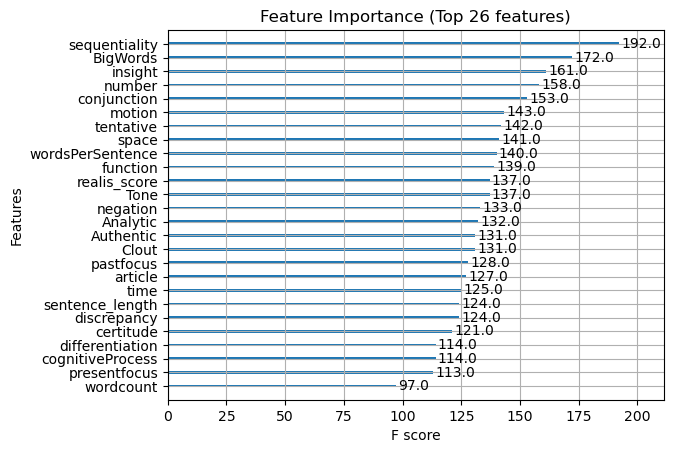

In [10]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from xgboost import plot_importance
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
le = LabelEncoder()
le.fit(['recalled', 'imagined'])

y_train_xg = le.transform(y_train)
y_test_xg = le.transform(y_test)

xgb_model.fit(X_train, y_train_xg)
print("Train score", xgb_model.score(X_train, y_train_xg))
print("Test score", xgb_model.score(X_test, y_test_xg))
print("f1 score weighted", f1_score(xgb_model.predict(X_test), y_test_xg))


print("f1 score recalled", f1_score(xgb_model.predict(X_test), y_test_xg, pos_label=0))
print("f1 score Imagined", f1_score(xgb_model.predict(X_test), y_test_xg, pos_label=1))
plot_importance(xgb_model, title= 'Feature Importance (Top 26 features)')

In [65]:
from xgboost import XGBClassifier
import xgboost
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
# Define the search space
param_grid = {
    # Percentage of columns to be randomly samples for each tree.
    "colsample_bytree": [ 0.3, 0.5 , 0.8 ],
    # reg_alpha provides l1 regularization to the weight, higher values result in more conservative models
    "reg_alpha": [0, 0.5, 1, 5],
    # reg_lambda provides l2 regularization to the weight, higher values result in more conservative models
    "reg_lambda": [0, 0.5, 1, 5]
    }
# Set up score
scoring = ['recall']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
# Define grid search
grid_search = GridSearchCV(estimator=XGBClassifier(),
                           param_grid=param_grid,
                           scoring=scoring,
                           refit='recall',
                           n_jobs=-1,
                           cv=kfold,
                           verbose=0)
# Fit grid search
grid_result = grid_search.fit(X_train, y_train_xg)
# Print grid search summary
grid_result
# Print the best score and the corresponding hyperparameters
print(f'The best score is {grid_result.best_score_:.4f}')
print('The best score standard deviation is', round(grid_result.cv_results_['std_test_recall'][grid_result.best_index_], 4))
# print(f'The best hyperparameters are {grid_result.best_params_}')

print("Train score", grid_search.score(X_train, y_train_xg))
print("Test score", grid_search.score(X_test, y_test_xg))
# plot_importance(grid_search)

The best score is 0.6752
The best score standard deviation is 0.0073
Train score 1.0
Test score 0.6181818181818182


In [70]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
print("Train score", clf.score(X_train, y_train))
print("Test score", clf.score(X_test, y_test))


print("f1 score recalled", f1_score(clf.predict(X_test), y_test, pos_label='recalled'))
print("f1 score Imagined", f1_score(clf.predict(X_test), y_test, pos_label='imagined'))

/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score 0.7529358626919602
Test score 0.6540198735320687
f1 score recalled 0.651501364877161
f1 score Imagined 0.6565022421524663


In [49]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
grid.fit(X_train, y_train)
print("Train score", grid.score(X_train, y_train))
print("Test score", grid.score(X_test, y_test))

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.503 total time=   0.9s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.504 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.504 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.504 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.504 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.504 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.542 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.541 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.527 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.542 total time=   0.9s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.528 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.504 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.504 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.504 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.504 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.631 total time=   0.7s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.658 total time=   0.7s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.653 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.652 total time=   0.7s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.641 total time=   0.7s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.542 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.538 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.527 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.544 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.529 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.504 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.504 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.504 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.644 total time=   0.6s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.661 total time=   0.6s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.677 total time=   0.6s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.668 total time=   0.7s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.646 total time=   0.7s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.631 total time=   0.9s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.658 total time=   0.7s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.653 total time=   0.7s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.7s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.642 total time=   0.7s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.542 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.538 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.528 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.544 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.529 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.504 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.504 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.659 total time=   0.6s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.668 total time=   0.6s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.679 total time=   0.6s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.667 total time=   0.6s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.660 total time=   0.6s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.644 total time=   0.6s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.663 total time=   0.6s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.677 total time=   0.6s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.668 total time=   0.6s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.649 total time=   0.6s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.631 total time=   0.7s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.659 total time=   0.7s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.653 total time=   0.7s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.650 total time=   0.7s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.642 total time=   0.7s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.542 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.538 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.527 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.544 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.529 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.504 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.503 total time=   0.8s


/Users/pranoysarath/miniconda/envs/penv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score 0.6718608852755195
Test score 0.6567299006323396


In [50]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]




for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train_xg)
    print(f" {name} Train score", clf.score(X_train, y_train_xg))
    print(f"{name} Test score", clf.score(X_test, y_test_xg))




 Nearest Neighbors Train score 0.7793586269196026
Nearest Neighbors Test score 0.5636856368563685
 Linear SVM Train score 0.5033875338753387
Linear SVM Test score 0.4968383017163505
 RBF SVM Train score 0.6230803974706414
RBF SVM Test score 0.6233062330623306
 Gaussian Process Train score 0.6919602529358627
Gaussian Process Test score 0.6702800361336947
 Decision Tree Train score 0.6675700090334237
Decision Tree Test score 0.5989159891598916
 Random Forest Train score 0.6808943089430894
Random Forest Test score 0.6332429990966576
 Neural Net Train score 0.49661246612466126
Neural Net Test score 0.5031616982836495
 AdaBoost Train score 0.6822493224932249
AdaBoost Test score 0.6594399277326106
 Naive Bayes Train score 0.6298554652213189
Naive Bayes Test score 0.6133694670280037
 QDA Train score 0.6705058717253839
QDA Test score 0.6169828364950316
